In [45]:
global ROOT_DIR
ROOT_DIR = '/gpfs/commons/groups/gursoy_lab/aelhussein/ot_cost/otcost_fl_rebase'
RESULTS_DIR = f'{ROOT_DIR}/results/sampleSize'

In [40]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(f'{ROOT_DIR}/code/helper/')
sys.path.append(f'{ROOT_DIR}/code/Synthetic/')
import OTCost as ot
import importlib
importlib.reload(ot)
from sklearn.preprocessing import normalize, StandardScaler
import copy
from emnist import extract_training_samples
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import Dataset
import pickle
import random
import os

In [ ]:
private = False

In [64]:
def wrangle_results(DATASET, results, save):
    df = pd.DataFrame.from_dict(results, orient = 'index')
    melt_df = pd.melt(df.iloc[:,:-1])
    ##taken true from full dataset
    melt_df['True'] = list(df.iloc[:,-1].values) * df.iloc[:,:-1].shape[1]
    ##rename columns
    melt_df.columns = ['sample_size', 'Estimated', 'True']
    if save:
        melt_df.to_csv(f'{RESULTS_DIR}/{DATASET}_data.csv')
    sns.lineplot(data = melt_df, x = 'True', y = 'Estimated', hue = 'sample_size', palette = 'deep')
    plt.plot([0.05, 0.41], [0.05, 0.41], linestyle = '--', color = 'black', alpha = 0.4)
    plt.xlabel('Full dataset OT cost', fontsize = 14)
    plt.ylabel(f'Sampled dataset OT cost', fontsize = 14)
    plt.legend(title = 'Sample size', fontsize = 12, title_fontsize = 12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if save:
        plt.savefig(f'{RESULTS_DIR}/{DATASET}_sample.pdf')
    plt.show()


## Synthetic

In [65]:
def loadData(name, size):
    ##load data
    X = pd.read_csv(f'{ROOT_DIR}/data/Synthetic/{name}.csv', sep = ' ', names = [i for i in range(13)])
    ##merge
    X = X.sample(frac = 1)
    X = X.iloc[:size]
    ##get X and label
    y = X.iloc[:,-1]
    X = X.iloc[:,:-1]
    return X.values,y.values

def dictionaryCreater(X1, y1, X2, y2):
    ##wrangle to dictionary for OT cost calculation
    data, label = {"1": X1, "2": X2}, {"1": np.array(y1).reshape(1,-1)[0], "2": np.array(y2).reshape(1,-1)[0]}
    return data, label

In [66]:
importlib.reload(ot)
DATASET = 'Synthetic'
cs = [0.03, 0.10, 0.20, 0.30, 0.40, 0.50]
sizes = [200, 400, 600, 800, 999]
results = {}
for c in cs:
    results[c] = {}
    for size in sizes:
        ## load data
        name1, name2 = f'data_1_{"{:.2f}".format(c)}',f'data_2_{"{:.2f}".format(c)}'
        X1, y1 = loadData(name1, size = size)
        X2, y2 = loadData(name2, size = size)

        data, label = dictionaryCreater(X1, y1, X2, y2)
        OTCost_label = ot.OTCost(DATASET, data, label)
        cost = OTCost_label.calculate_ot_cost()
        results[c][size] = round(cost,2)

cost: 0.04
cost: 0.03
cost: 0.02
cost: 0.02
cost: 0.02
cost: 0.07
cost: 0.07
cost: 0.08
cost: 0.07
cost: 0.07
cost: 0.19
cost: 0.16
cost: 0.16
cost: 0.16
cost: 0.16
cost: 0.27
cost: 0.28
cost: 0.28
cost: 0.26
cost: 0.26
cost: 0.39
cost: 0.37
cost: 0.34
cost: 0.36
cost: 0.36
cost: 0.46
cost: 0.48
cost: 0.45
cost: 0.46
cost: 0.46


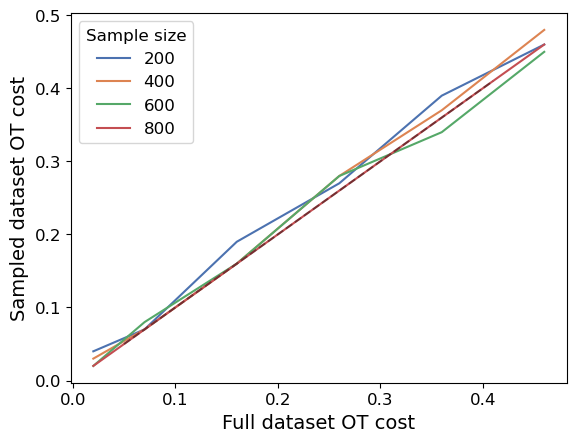

In [67]:
wrangle_results(DATASET, results, save = True)

## credit data

In [68]:
def loadData(name):
    ##load data
    data = pd.read_csv(f'{ROOT_DIR}/data/Credit/{name}.csv', sep = ' ', names = [i for i in range(29)])
    ##get X and label
    y = data.iloc[:,-1]
    X = data.iloc[:,:-1]
    return X,y

def dictionaryCreater(X1, y1, X2, y2):
    ##wrangle to dictionary for OT cost calculation
    data_, label = {"1": X1, "2": X2}, {"1": np.array(y1).reshape(1,-1)[0], "2": np.array(y2).reshape(1,-1)[0]}
    data= {"1" : normalize(data_['1'], axis = 1, norm = 'l2'), "2" : normalize(data_['2'], axis = 1, norm = 'l2')}
    return data, data_, label

def sampler(X, y, size):
    return X.iloc[:size,:], y.iloc[:size] 

In [79]:
importlib.reload(ot)
cs = [0.12, 0.23, 0.30, 0.40]
sizes = [200, 400, 600, 800, 999]
results = {}
for c in cs:
    results[c] = {}
    for size in sizes:
        ## load data
        name1, name2 =  f'data_1_{"{:.2f}".format(c)}',f'data_2_{"{:.2f}".format(c)}'
        X1, y1 = loadData(name1)
        X2, y2 = loadData(name2)

        ##sample
        X1, y1 = sampler(X1, y1, size)
        X2, y2 = sampler(X2, y2, size)
        data = {'1':X1.values, "2": X2.values}
        label = {"1":y1.values, "2":y2.values}
        OTCost_label = ot.OTCost(DATASET, data, label)
        cost = OTCost_label.calculate_ot_cost()
        results[c][size] = round(cost,2)

/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.21


/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.17


/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.11


/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.09


/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.25


/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.20


/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.20
cost: 0.20


/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.34


/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.33
cost: 0.33
cost: 0.30


/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.44


/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.41
cost: 0.41
cost: 0.40


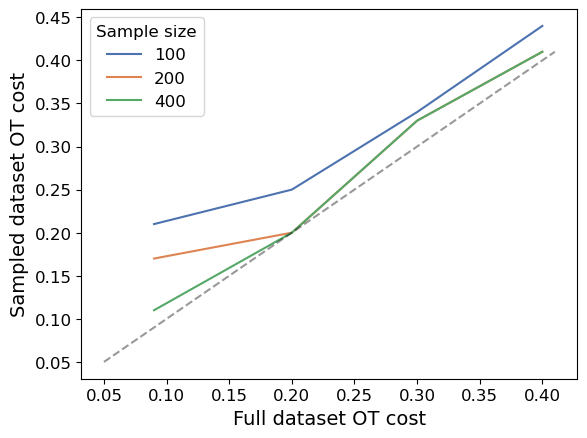

In [80]:
DATASET = 'Credit'
wrangle_results(DATASET, results, save = True)

## Weather 

In [87]:
def extractData(df, climates,n = 2000):
    df = df[df['climate'].isin(climates)]
    ind = np.random.choice(df.shape[0], n)
    X = df.iloc[ind, 6:]
    y = df.iloc[ind, 5]
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)
    return X_normalized, y.values

In [88]:
def dictionaryCreator(df, climates):
    ##wrangle to dictionary for OT cost calculation
    X1, y1 = extractData(df, climates[0],n = 4000)  
    X2, y2 = extractData(df, climates[1],n = 4000)  
    data, label = {"1": X1, "2": X2}, {"1": y1, "2": y2}
    return data, label

In [89]:
def sampler(data, label, num = 500):
    data_, label_  = {}, {}
    for i in data:
        idx = np.random.choice(np.arange(data[i].shape[0]), num, replace=False)
        data_[i] = data[i][idx]
        label_[i] = label[i][idx]
    return data_, label_
## load data
##load dataset
df = pd.read_csv(f'{ROOT_DIR}/data/Weather/shifts_canonical_train.csv', nrows = 20000)
df_snow = pd.read_csv(f'{ROOT_DIR}/data/Weather/shifts_canonical_eval_out.csv', nrows = 5000)
df = pd.concat([df, df_snow])
df.dropna(inplace = True)

In [ ]:
costs = [0.11, 0.19, 0.3, 0.4, 0.48]
climates = [[['tropical', 'mild temperate'],['tropical', 'mild temperate']],
            [['tropical', 'mild temperate'], ['dry', 'mild temperate']],
            [['tropical', 'mild temperate'], ['dry']],
            [['tropical', 'mild temperate'], ['snow', 'dry']],
            [['tropical', 'mild temperate'],['snow']]]
nums = [200, 400, 600, 800, 999]
results = {}
for climate, ac in zip(climates, costs):
    results[ac] = {}
    for num in nums:
        data, label = dictionaryCreator(df, climate)
        data_, label_ = sampler(data, label, num = num)
        OTCost_label = ot.OTCost(DATASET, data_, label_)
        cost = OTCost_label.calculate_ot_cost()
        results[ac][num] = round(cost,2)

In [ ]:
results = {}
results[0.11] = {200:0.19, 400:0.15, 600:0.13, 800:0.12, 999:11}
results[0.19] = {200:0.23, 400:0.21, 600:0.2, 800:0.19, 999:19}
results[0.30] = {200:0.40, 400:0.35, 600:0.33, 800:0.31, 999:0.3}
results[0.40] = {200:0.47, 400:0.44, 600:0.41, 800:0.40, 999:4}
results[0.48] = {200:0.52, 400:0.5, 600:0.47, 800:0.48, 999:48}

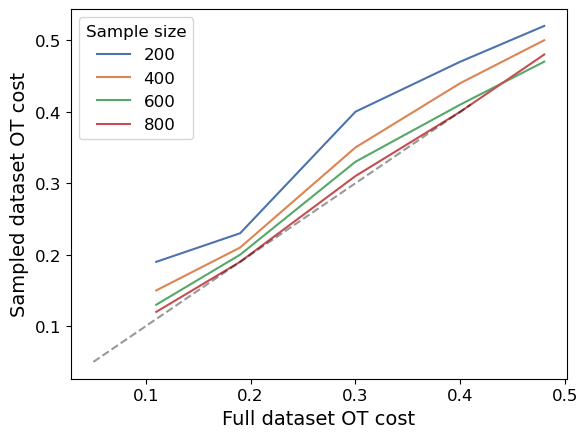

In [100]:
DATASET = 'Weather'
wrangle_results(DATASET, results, save = True)

## EMNIST

In [105]:
##load dataset
images_full, labels_full = extract_training_samples('byclass')

def loadData(name, indices):
    ##load data
    data = pd.read_csv(f'{ROOT_DIR}/data/EMNIST/{name}.csv', sep = ' ', names = [i for i in range(785)])
    ##get X and label
    if len(indices) < 3:
        load_size = len(indices) * 15
    elif len(indices) == 3:
        load_size = len(indices) * 27
    else:
        load_size = len(indices) * 40
    
    y = data.iloc[:load_size,-1]
    X = data.iloc[:load_size,:-1]
    return X,y

def getIndices(indices, size):
    indices_use = []
    ## loop through and pull indices
    for ind in indices:
        indices_use.extend(np.where(np.isin(labels_full, ind) == True)[0][:size])
    return indices_use

def pull_labels(images, labels, indices, size):
    ##get indices for x, i
    ind_1 =  getIndices(indices[0], size)
    ind_2 =  getIndices(indices[1], size)

    ##pull data and labels
    X1 = images[ind_1] / 255
    X2 = images[ind_2] / 255
    y1 = labels[ind_1]
    y2 = labels[ind_2]

    return {"1": X1, "2": X2}, {"1":y1, "2":y2}

def sampler(data, label, num = 300):
    data_, label_  = {}, {}
    for i in data:
        idx = np.random.choice(np.arange(data[i].shape[0]), num, replace=False)
        data_[i] = data[i][idx]
        label_[i] = label[i][idx].reshape(1,-1)[0]
        data_[i] = data_[i].reshape((num, 28*28))
    return data_, label_

In [124]:
importlib.reload(ot)
costs = [0.11,0.19,0.25,0.34,0.39]
indices =  [
            [[x for x in range(10)], [x for x in range(10)]],
            [[x for x in range(10)] + [12,24,18,28], [x for x in range(10)] + [x + 26 for x in [12,24,18,28]]],
            [[x for x in range(10)] + [11,12,13,14,16,24,18,28], [x for x in range(10)] + [x + 26 for x in [11,12,13,14,16,24,18,28]]],
            [[x for x in range(10)] + [x for x in range(10, 25)], [x for x in range(10)] + [x for x in range(36, 51)]],
            [[x for x in range(10)] +[x for x in range(10, 35)], [x for x in range(10)] +[x for x in range(36, 61)]]
            ]

nums = [200, 400, 600, 800, 999]

results = {}
for ind, ac in zip(indices, costs):
    results[ac] = {}
    for num in nums:
        importlib.reload(ot)
        data, label = pull_labels(images_full, labels_full, ind, size = 5000)
        data_, label_ = sampler(data, label, num = num)
        OTCost_label = ot.OTCost(DATASET, data_, label_)
        cost = OTCost_label.calculate_ot_cost()
        results[ac][num] = round(cost,2)

/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.21


/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.18


In [ ]:
DATASET = 'EMNIST'
wrangle_results(DATASET, results, save = True)

## CIFAR

In [ ]:
DATASET = 'CIFAR'
DATA_DIR = f'{ROOT_DIR}/data/CIFAR'

In [ ]:
n_emb = 1000
class EmbeddedImagesDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, embedding, label, coarse_label = self.data[idx]
        return image, embedding, label, coarse_label
    
with open(f'{DATA_DIR}/cifar_{n_emb}_emb.pkl', 'rb') as f:
    data= pickle.load(f)
    
def extract_by_labels(dataset, target_labels, label_type = 'fine'):
    extracted_data = []
    for image, embedding, fine_label, coarse_label in dataset:
        if label_type == 'fine':
            label = fine_label
        else:
            label = coarse_label
        if label in target_labels:
            extracted_data.append((image, embedding, fine_label, coarse_label))
    return EmbeddedImagesDataset(extracted_data)

def get_datasets(dataset, labels_extract, label_type = 'fine'):
    d1 = extract_by_labels(dataset, labels_extract[0], label_type)
    d2 = extract_by_labels(dataset, labels_extract[1], label_type)
    return d1, d2

def sampler(dataset, num_samples):
    indices = random.sample(range(len(dataset)), num_samples)
    sampled_data = [dataset[i] for i in indices]
    embs = np.array([entry[1] for entry in sampled_data])
    label = np.array([entry[2] for entry in sampled_data])
    return embs, label


In [ ]:
importlib.reload(ot)
costs = [0.08, 0.21, 0.30, 0.38]
indices =  [
            [[x for x in range(10)], [x for x in range(10)]],
            [[11,98,29,73, 78, 49, 97, 51, 55, 92], [11,98,29,73, 78, 49, 42, 83, 72, 82]],
            [[11,50,78,1,92, 78, 49, 97, 55, 16, 14], [11, 36, 29, 73, 82, 78, 49, 42, 12, 23, 51]],
            [[11,50,78,8,92,2,49,98,89,3], [17, 36, 30, 73, 83,28, 34, 42, 10, 20]]
            ]

nums = [200, 400, 600, 800, 999]

results = {}
for ind, ac in zip(indices, costs):
    results[ac] = {}
    for num in nums:
        importlib.reload(ot)
        d1, d2 = get_datasets(data, ind)
        x1, y1 =  sampler(d1, num)
        x2, y2 =  sampler(d2, num)
        data_ = {'1': x1, '2': x2}
        label_ = {'1': y1, '2': y2}
        OTCost_label = ot.OTCost(DATASET, data_, label_)
        cost = OTCost_label.calculate_ot_cost()
        results[ac][num] = round(cost,2)

cost: 0.17
Degenerate vector, reducing dimension
cost: 0.14


/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.08
cost: 0.06
cost: 0.25
cost: 0.24
cost: 0.19
cost: 0.19
Degenerate vector, reducing dimension
Degenerate vector, reducing dimension
Degenerate vector, reducing dimension
cost: 0.31
cost: 0.31
cost: 0.28
cost: 0.28
cost: 0.35
cost: 0.36
cost: 0.37
cost: 0.37


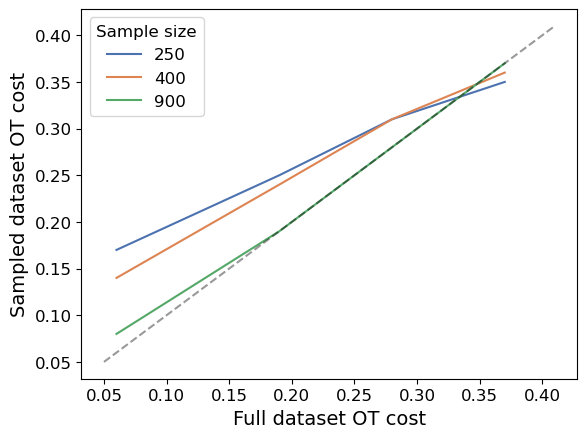

In [ ]:
DATASET = 'CIFAR'
wrangle_results(DATASET, results, save = True)

## IXITiny

In [ ]:
DATASET = 'IXITiny'
DATA_DIR = f'{ROOT_DIR}/data/{DATASET}'

In [ ]:
files = os.listdir(f'{DATA_DIR}/embedding')
sites = ['Guys', 'HH', 'IOP']
site_samples = {}
site_embeddings = {}
for site in sites:
    site_samples[site] = [file for file in files if site in file]

for site, files in site_samples.items():
    embeddings = [np.load(f'{DATA_DIR}/embedding/{file}') for file in files]
    site_embeddings[site] = np.array(embeddings) 

In [ ]:
importlib.reload(ot)
costs = [0.08, 0.21, 0.30, 0.38]
indices =  [['Guys', 'HH'],
            ['Guys', 'IOP'],
            ['HH', 'IOP']]

nums = [20, 50, 100, 200, 400]

results = {}
for ind, ac in zip(indices, costs):
    results[ac] = {}
    for num in nums:
        importlib.reload(ot)
        X1, X2 = site_embeddings[ind[0]][:num], site_embeddings[ind[1]][:num]
        data = {'1': X1, '2': X2}
        labels = {'1': np.ones(X1.shape[0]), '2': np.ones(X2.shape[0])}
        OTCost_label = ot.OTCost(DATASET, data, label)
        cost = OTCost_label.calculate_ot_cost()
        results[ac][num] = round(cost,2)

IndexError: index 22 is out of bounds for axis 0 with size 20

In [ ]:
wrangle_results(DATASET, results, save = True)

## ISIC

In [ ]:
DATASET = 'ISIC'
DATA_DIR = f'{ROOT_DIR}/data/{DATASET}'

In [ ]:
##Load labels
labels = pd.read_csv(f'{DATA_DIR}/ISIC_2019_Training_GroundTruth.csv')
def create_category(row):
    for idx, value in enumerate(row):
        if value == 1:
            return idx
    return None

labels['label'] = labels.apply(create_category, axis=1) - 1
labels = labels[['image', 'label']]
labels.set_index('image', inplace = True)

NUM_SAMPLES = 2000
files = os.listdir(f'{DATA_DIR}/embedding')
sites = [i for i in range(6)]
site_samples = {}
site_embeddings = {}
site_labels = {}
for site in sites:
    sites_files = [file for file in files if f'center_{site}' in file]
    sites_files = np.random.choice(sites_files, size = NUM_SAMPLES)
    site_samples[site] = sites_files
    names = [f.split(f'center_{site}_')[-1].split('.npy')[0] for f in sites_files]
    labels_site = labels.loc[names]
    site_labels[site] = labels_site['label'].values

for site, files in site_samples.items():
    embeddings = [np.load(f'{DATA_DIR}/embedding/{file}') for file in files]
    site_embeddings[site] = np.array(embeddings)

In [ ]:
def create_dictionaries(site_embeddings, site_labels, sites, NUM_SAMPLES = 500):
    data = {'1': site_embeddings[sites[0]][:NUM_SAMPLES], '2' :site_embeddings[sites[1]][:NUM_SAMPLES]}
    labels = {'1': site_labels[sites[0]][:NUM_SAMPLES], '2': site_labels[sites[1]][:NUM_SAMPLES]}
    data, labels = remove_rare_labels(data, labels, min_count = 30)
    return data, labels

#Function is needed as estimating label cost with fewer data points leads to degeneracy
def remove_rare_labels(data, labels, min_count):
    for key in labels:
        unique_labels, counts = np.unique(labels[key], return_counts=True)
        labels_to_remove = unique_labels[counts <= min_count]
        mask = np.isin(labels[key], labels_to_remove, invert=True)
        labels[key] = labels[key][mask]
        data[key] = data[key][mask]
    return data, labels

In [ ]:
importlib.reload(ot)
site_pairs = [(2,2), (2,0), (2,3), (2,1), (1,3)]
results = {}
nums = [200, 400, 600, 800, 999]

results = {}
for ind, ac in zip(site_pairs, costs):
    results[ac] = {}
    for num in nums:
        importlib.reload(ot)
        if ind[0] != ind[1]:
            data, labels = create_dictionaries(site_embeddings, site_labels, ind, num)
            ISIC_OTCost_label = ot.OTCost(DATASET, data, labels)
            cost = ISIC_OTCost_label.calculate_ot_cost()
            results[ac][num] = round(cost,2)
        else:
            data = {'1': site_embeddings[ind[0]][:num], '2' :site_embeddings[ind[0]][num:num*2]}
            labels = {'1': site_labels[ind[0]][:num], '2': site_labels[ind[0]][num:num*2]}
            data, labels = remove_rare_labels(data, labels, min_count = 30)
            OTCost_label = ot.OTCost(DATASET, data, labels)
            cost = OTCost_label.calculate_ot_cost()
            results[ac][num] = round(cost,2)

cost: 0.13
cost: 0.12
Degenerate vector, reducing dimension
Degenerate vector, reducing dimension


/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.10


/gpfs/commons/home/aelhussein/anaconda3/envs/torch_env/lib/python3.10/site-packages/ot/bregman.py:1112: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


cost: 0.10
cost: 0.27
cost: 0.26
Degenerate vector, reducing dimension
Degenerate vector, reducing dimension
Degenerate vector, reducing dimension
cost: 0.23
cost: 0.23
cost: 0.22
Degenerate vector, reducing dimension
Degenerate vector, reducing dimension
cost: 0.21
Degenerate vector, reducing dimension
cost: 0.20
Degenerate vector, reducing dimension
cost: 0.20
cost: 0.16
cost: 0.21
cost: 0.22
Degenerate vector, reducing dimension
cost: 0.22


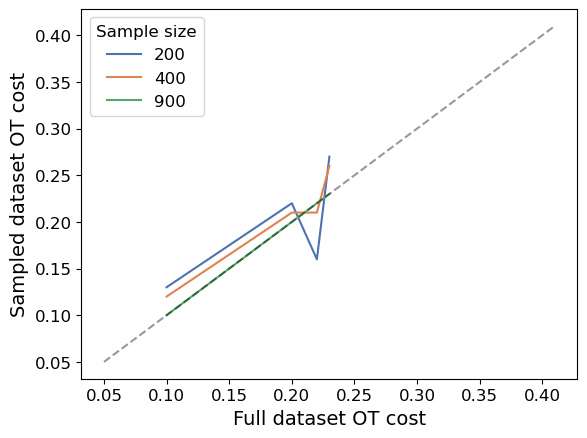

In [ ]:
DATASET = 'ISIC'
wrangle_results(DATASET, results, save = True)